In [1]:
import sys
import os

sys.path.insert(0, os.path.join(os.getcwd(), "src"))
from ml2048.prelude import *

This notebook contains random bits for experiment purpose.

In [2]:
from ml2048.game_numba import VecGame
from ml2048.runner import VecRunner
from ml2048.policy.random import RandomPolicy


size = 4096
game = VecGame(size)
runner = VecRunner(game, size)
policy = RandomPolicy()
%prun runner.step_many(policy, 16)


         15115206 function calls (14072169 primitive calls) in 9.151 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     6103    0.674    0.000    0.766    0.000 ffi.py:190(__call__)
466560/576    0.641    0.000    1.332    0.002 copy.py:128(deepcopy)
395790/69508    0.454    0.000    0.637    0.000 ir.py:317(_rec_list_vars)
       16    0.395    0.025    7.497    0.469 game_numba.py:615(step)
  2604747    0.334    0.000    0.427    0.000 {built-in method builtins.isinstance}
  1135274    0.143    0.000    0.166    0.000 {method 'get' of 'dict' objects}
    48176    0.114    0.000    0.121    0.000 win32.py:108(_winapi_test)
470103/469241    0.105    0.000    0.234    0.000 {built-in method builtins.getattr}
   175232    0.092    0.000    0.137    0.000 targetconfig.py:111(getter)
13696/576    0.088    0.000    1.323    0.002 copy.py:227(_deepcopy_dict)
     5604    0.087    0.000    0.092    0.000 numpy_support.py:394(<li

In [18]:
rand = np.random.default_rng()
for power in range(10):
    size = 1024 * 2 ** power
    out = np.empty((size,), dtype=np.float32)
    %timeit rand.random((size,), dtype=np.float32, out=out)

print("int")
for power in range(10):
    size = 1024 * 2 ** power
    %timeit rand.integers(0, 16, (size,), dtype=np.int8)


3.42 µs ± 117 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
6.56 µs ± 619 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
10.9 µs ± 290 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
21.9 µs ± 1.83 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
44.1 µs ± 3.33 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
84.6 µs ± 5.61 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
157 µs ± 4.36 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
328 µs ± 33.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
608 µs ± 2.45 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.21 ms ± 3.73 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
int
9.81 µs ± 41.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
12.7 µs ± 463 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
17.5 µs ± 872 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
28.4 µs ± 1.71 µs per loop

In [19]:
rand = torch.Generator()
rand.seed()

for power in range(10):
    size = 1024 * 2 ** power
    out = torch.empty((size,), dtype=torch.float32)
    %timeit out.uniform_(generator=rand)

print("int")
for power in range(10):
    size = 1024 * 2 ** power
    out = torch.empty((size,), dtype=torch.int8)
    %timeit torch.randint(0, 16, (size,), out=out, dtype=torch.int8, generator=rand)


5.59 µs ± 72.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
9.55 µs ± 22.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
18.1 µs ± 840 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
36.6 µs ± 3.62 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
70.2 µs ± 3.72 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
141 µs ± 6.12 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
259 µs ± 877 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
554 µs ± 28.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.09 ms ± 76 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.06 ms ± 4.49 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
int
12.5 µs ± 295 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
23.6 µs ± 2.44 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
36.4 µs ± 121 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
69.1 µs ± 97.8 ns per loop (mean

50.0 28.87040035517924


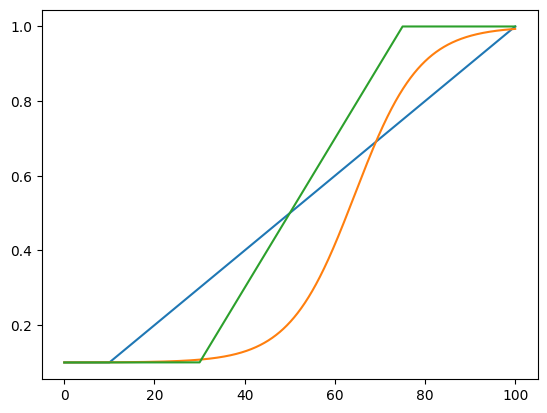

In [119]:
import matplotlib.pyplot as plt


lines = np.linspace(0, 100, 10000)
y = np.clip(lines / 100, 0.1, 1)
plt.plot(lines, y)

std = np.std(lines)
mean = np.mean(lines)
z = (lines - mean) / std * 2 - 1
print(mean, std)
y = (np.tanh(z) + 1) * 0.5 * 0.9  + 0.1
plt.plot(lines, y)

y = np.clip(lines / 100 * 2- 0.5, 0.1, 1)
plt.plot(lines, y)


-10.034527486527764 10.034527486527764


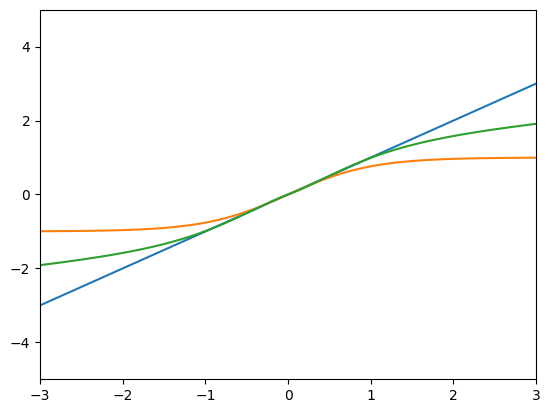

In [129]:
import matplotlib.pyplot as plt

lines = np.linspace(-100, 100, 10000)
# y = np.tanh(x) * np.sqrt(np.abs(x) + 0.6917451523545706)
y = np.tanh(lines) * np.sqrt(np.abs(lines) + 0.6917418778812134)
# y = np.tanh(x) * np.sqrt(np.abs(x) + 0.8014407207247132)

plt.plot(lines, lines)
plt.plot(lines, np.tanh(lines))
plt.plot(lines, y)
plt.xlim([-3, 3])
plt.ylim([-5, 5])
print(np.min(y), np.max(y))


In [123]:
from scipy.integrate import quad
from scipy.optimize import bisect

bisect(
    lambda c: quad(lambda x: np.tanh(x) * np.sqrt(np.abs(x) + c) - x, 0.0, 1.5)[0],
    0,
    2,
)


0.8014407207247132

In [10]:
import torch
lines = torch.arange(10).reshape(5, 2)
lines.share_memory_()
cudart = torch.cuda.cudart()
r = cudart.cudaHostRegister(lines.data_ptr(), lines.numel() * lines.element_size(), 0)
assert lines.is_shared()
assert lines.is_pinned()
y = lines.clone()
print(lines.is_shared(), lines.is_pinned())
print(y.is_shared(), y.is_pinned())

True True
False False


In [8]:
torch.version.cuda

'12.1'

In [3]:
torch.__version__

'2.1.2+cu121'

In [20]:
from ml2048 import game_numba

# importlib.reload(game_numba)

np.random.seed(12322)

state = np.random.randint(8, 11, (16,), dtype=np.int8)
merged = np.zeros_like(state, dtype=np.int8)
prev_state = state.copy()
game_numba._step_left(state, merged)
print(prev_state)
print(state)
print(merged)
print(game_numba.reward_fn_normal(state, prev_state, merged))
print(game_numba.reward_fn_rank(state, prev_state, merged))
print(game_numba.reward_fn_maxcell(state, prev_state, merged))


[10 10  8 10 10  9  8 10  9 10  9  9 10 10  9  9]
[11  8 10  0 10  9  8 10  9 10 10  0 11 10  0  0]
[0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0]
6144.0
42.0
2052.0


In [3]:
# Performance test


def run(device, max_size: int | None = None):
    print("device", device)
    from ml2048.policy.actor_critic import ActorCriticPolicy
    # importlib.reload(ml2048.game_numba)
    from timeit import timeit, repeat
    from functools import partial

    policy = ActorCriticPolicy().to(device)

    def work(a, b):
        a = a.to(device, torch.long)
        b = b.to(device, torch.bool)
        with torch.no_grad():
            c, d = policy.sample_actions(a, b)
            c = c.cpu()
            d = d.cpu()
            torch.cuda.synchronize()
            return c[0]

    max_power = 16  # 18 is very slow with 8G GPU memory
    batch_dim = 2**max_power

    for power in range(0, max_power + 1):
    # for power in (10,):
        size = 2**power
        if max_size is not None and size > max_size:
            break

        state = torch.randint(0, 16, (2, size, 16), dtype=torch.int8)
        valid_actions = torch.randint(0, 2, (2, size, 4), dtype=torch.bool)

        fn = partial(work, state, valid_actions)
        result = repeat(fn, repeat=5, number=10)
        result.sort()

        print(
            f"{size:>6d}",
            ", ".join(f"{s:.4f}" for s in result),
        )


torch.set_num_threads(12)

run("cpu", 1024)
run("cuda:0")

device cpu
     1 0.0142, 0.0148, 0.0150, 0.0159, 0.1973
     2 0.0147, 0.0147, 0.0153, 0.0161, 0.0168
     4 0.0176, 0.0181, 0.0185, 0.0188, 0.0194
     8 0.0232, 0.0239, 0.0244, 0.0244, 0.0255
    16 0.0300, 0.0304, 0.0312, 0.0317, 0.0343
    32 0.0388, 0.0395, 0.0400, 0.0404, 0.0414
    64 0.0560, 0.0581, 0.0587, 0.0591, 0.0597
   128 0.0792, 0.0795, 0.0833, 0.0843, 0.0879
   256 0.1289, 0.1330, 0.1342, 0.1343, 0.1343
   512 0.2325, 0.2333, 0.2341, 0.2387, 0.2387
  1024 0.4431, 0.4468, 0.4624, 0.4645, 0.4831
device cuda:0
     1 0.0266, 0.0266, 0.0267, 0.0268, 0.5371
     2 0.0326, 0.0331, 0.0335, 0.0337, 0.0385
     4 0.0330, 0.0340, 0.0342, 0.0343, 0.0444
     8 0.0333, 0.0338, 0.0341, 0.0345, 0.0435
    16 0.0342, 0.0349, 0.0349, 0.0370, 0.0373
    32 0.0346, 0.0350, 0.0350, 0.0355, 0.0373
    64 0.0345, 0.0356, 0.0409, 0.0417, 0.0479
   128 0.0338, 0.0344, 0.0346, 0.0357, 0.0374
   256 0.0328, 0.0336, 0.0345, 0.0351, 0.0377
   512 0.0321, 0.0322, 0.0326, 0.0328, 0.0374
  1024 0.

In [4]:
torch.cuda.empty_cache()

In [15]:
state = np.arange(16)
print(state.__array_interface__)
board = state.reshape((4, 4))
print(board.__array_interface__)
print(memoryview(board), board.__array_interface__)
print(board)

board_right = board[::, ::-1]
print(memoryview(board_right), board_right.__array_interface__)
print(board_right)

board_t = np.transpose(board)
print(memoryview(board_t), board_t.__array_interface__)
print(board_t)

board_t2 = board_t[:, ::-1]
print(memoryview(board_t2), board_t2.__array_interface__)
print(board_t2)


{'data': (2711160909328, False), 'strides': None, 'descr': [('', '<i4')], 'typestr': '<i4', 'shape': (16,), 'version': 3}
{'data': (2711160909328, False), 'strides': None, 'descr': [('', '<i4')], 'typestr': '<i4', 'shape': (4, 4), 'version': 3}
<memory at 0x0000027741CBF370> {'data': (2711160909328, False), 'strides': None, 'descr': [('', '<i4')], 'typestr': '<i4', 'shape': (4, 4), 'version': 3}
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
<memory at 0x0000027741CBF440> {'data': (2711160909340, False), 'strides': (16, -4), 'descr': [('', '<i4')], 'typestr': '<i4', 'shape': (4, 4), 'version': 3}
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]
 [15 14 13 12]]
<memory at 0x0000027741CBF370> {'data': (2711160909328, False), 'strides': (4, 16), 'descr': [('', '<i4')], 'typestr': '<i4', 'shape': (4, 4), 'version': 3}
[[ 0  4  8 12]
 [ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]]
<memory at 0x0000027741CBF440> {'data': (2711160909376, False), 'strides': (4, -16), 'descr': [('', '<i

In [24]:
print(torch.finfo(torch.float32))
torch.log10(torch.tensor(torch.finfo(torch.float32).max))

finfo(resolution=1e-06, min=-3.40282e+38, max=3.40282e+38, eps=1.19209e-07, smallest_normal=1.17549e-38, tiny=1.17549e-38, dtype=float32)


tensor(38.5318)

In [12]:
min(abs(torch.tensor(-1)), 0)

0

In [8]:
state = torch.BoolTensor([[1, 0, 1, 0], ])
state.sum(dim=1) == 0

tensor([False])

In [12]:
state = torch.BoolTensor([1, 2, 3, 4]).float()

state = torch.distributions.Categorical(probs=state)
print(state.probs)
sample = state.sample()
probs = torch.gather(state.probs, -1, sample)

print(sample, probs)

tensor([0.2500, 0.2500, 0.2500, 0.2500])
tensor(3) tensor(0.2500)


In [6]:
# Assign value to a singleton
state = np.zeros(())
state[None] = 123
print(state)

123.0


In [12]:
rng = np.random.default_rng(12345)
state = rng.random((4,), dtype=np.float32)
print(state.dtype, state.shape)
print(state)

float32 (4,)
[0.699215   0.22733599 0.78864694 0.31675833]


In [17]:
# Empty tensor
state = torch.Tensor(0)
print(state.shape, state.numel())

torch.Size([0]) 0


In [21]:
logits = torch.Tensor([1, 1, -torch.inf])
dist = torch.distributions.Categorical(logits=logits)
print(dist.probs)
print(dist.logits)

tensor([0.5000, 0.5000, 0.0000])
tensor([-0.6931, -0.6931,    -inf])


In [27]:
zero = torch.Tensor([0])
neg_inf = torch.Tensor([-torch.inf])
print(zero, neg_inf)
print(zero * neg_inf)

tensor([0.]) tensor([-inf])
tensor([nan])


In [32]:
state = torch.Tensor([0, 1, 2, 3])
print(state.dtype, state.shape)
state = state.to(device=None, dtype=None)
print(state.dtype, state.shape, state.device)

torch.float32 torch.Size([4])
torch.float32 torch.Size([4]) cpu


In [29]:
logits = torch.Tensor([[1, 1, 1, 1], [0, -10, -10, -10]])
print(logits)
dist = torch.distributions.Categorical(logits=logits)
print(dist.logits)
print(dist.probs)
print(dist.probs.sum(dim=1))
print(dist.entropy())

tensor([[  1.,   1.,   1.,   1.],
        [  0., -10., -10., -10.]])
tensor([[-1.3863e+00, -1.3863e+00, -1.3863e+00, -1.3863e+00],
        [-1.3625e-04, -1.0000e+01, -1.0000e+01, -1.0000e+01]])
tensor([[2.5000e-01, 2.5000e-01, 2.5000e-01, 2.5000e-01],
        [9.9986e-01, 4.5394e-05, 4.5394e-05, 4.5394e-05]])
tensor([1., 1.])
tensor([1.3863, 0.0015])
